In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Concatenate,UpSampling2D,Dropout,Input,Add,Conv2DTranspose
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
from tensorflow.keras.metrics import Accuracy,Precision , Recall
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def fcn(input_size):
    input_scan = Input(input_size)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")(input_scan)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu")(pool1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu")(pool2)
    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu")(pool3)
    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    conv5 = Conv2D(512, (3, 3), padding="same", activation="relu")(pool4)
    conv6 =  Conv2D(128, (1, 1), padding="same")(conv5)
    conv7 =  Conv2D(64, (1, 1), padding="same")(pool4)
    merge1 = Concatenate()([conv7, conv6])
    up2 =  UpSampling2D((2, 2))(merge1)
    conv8 =  Conv2D(64, (1, 1), padding="same")(pool3)
    merge2 = Concatenate()([conv8,up2])
    up3 = UpSampling2D((8, 8))(merge2)
    out_layer = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(up3)
    model = tf.keras.Model(input_scan, out_layer, name='fcn')
    return model

In [3]:
fcn = fcn((512,512,1))

In [4]:
fcn.summary()

Model: "fcn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']                 
                                )                                                               

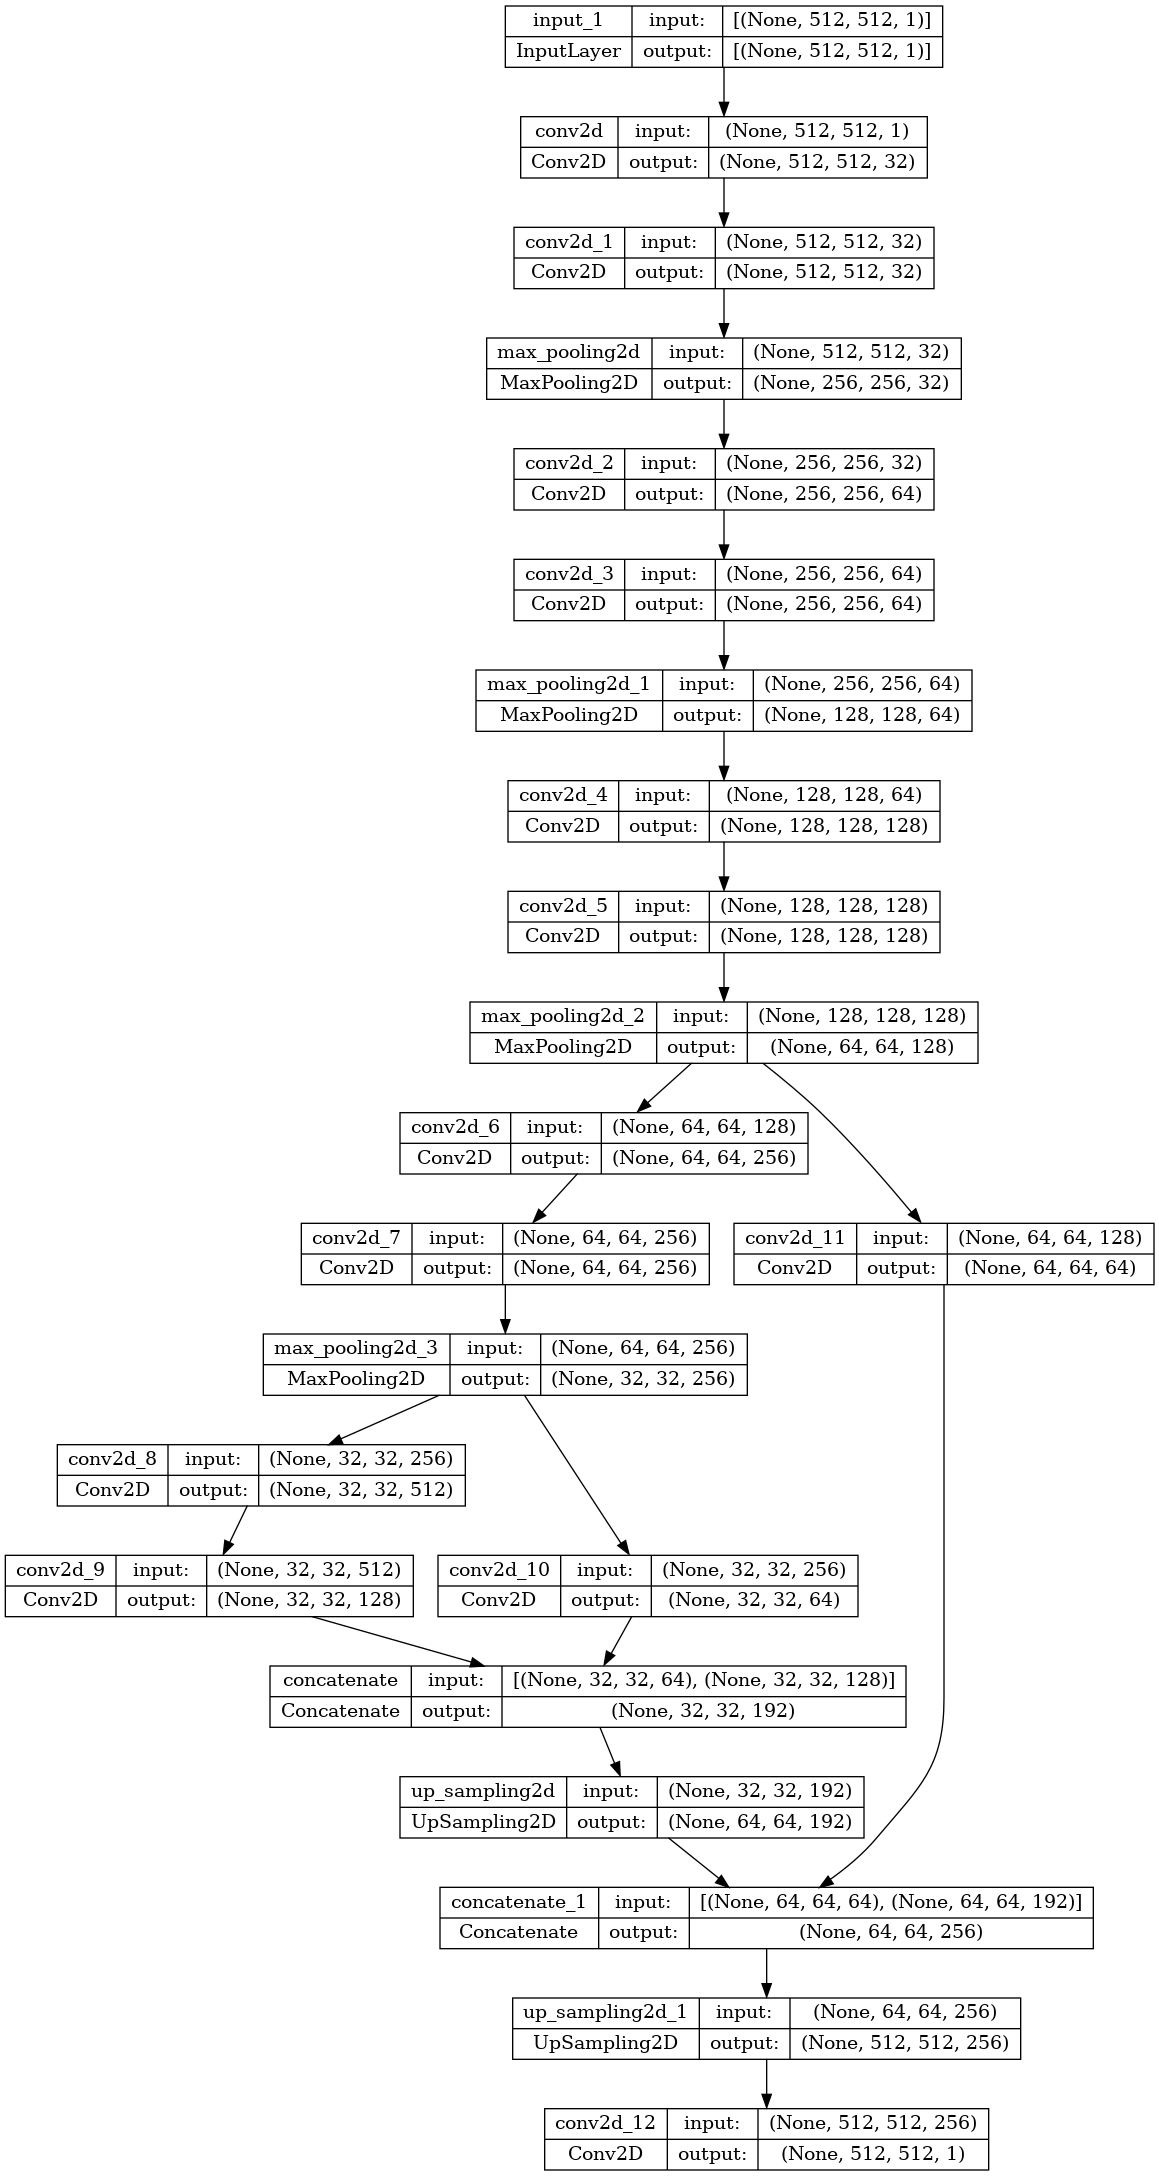

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(fcn, show_shapes=True, rankdir='TB',
to_file='model_cifar10.png')

In [6]:
X1 = np.load("/kaggle/input/data12/X1.npy")
X0 = np.load("/kaggle/input/data12/X0.npy")
Y1 = np.load("/kaggle/input/data12/mask1.npy")
Y0 = np.load("/kaggle/input/data12/mask0.npy")

In [7]:
X1.shape

(1153, 512, 512, 1)

In [8]:
X = np.concatenate((X1,X0),axis=0)
Y = np.concatenate((Y1,Y0),axis=0)

In [9]:
X1=0
X0=0
Y1 =0
Y0=0

In [10]:
X=X/255
Y=Y/255

In [11]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.20,random_state=48)

In [12]:
from tensorflow.keras.layers import Flatten
def iou_score(y_true, y_pred):
    intersection = 0 
    y_true_f = Flatten()(y_true)
    y_pred_f = Flatten()(y_pred)
    intersection =  (2.*(y_true_f * y_pred_f) + tf.keras.backend.epsilon())
    union = (y_true_f + y_pred_f + tf.keras.backend.epsilon())
    return (intersection/union)

In [13]:
fcn.compile(optimizer = Adam(learning_rate=0.0001),loss = "BinaryCrossentropy",metrics=[iou_score])

In [14]:

X=0
Y=0

In [15]:
hist = fcn.fit(Xtrain,Ytrain,epochs=50,batch_size=8,validation_data=(Xtest,Ytest))

Epoch 1/50
144/144 [==============================] - 40s 194ms/step - loss: 0.0672 - iou_score: 0.3458 - val_loss: 0.0047 - val_iou_score: 0.0851
Epoch 2/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0038 - iou_score: 0.1944 - val_loss: 0.0038 - val_iou_score: 0.2361
Epoch 3/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0036 - iou_score: 0.2473 - val_loss: 0.0037 - val_iou_score: 0.2576
Epoch 4/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0036 - iou_score: 0.2698 - val_loss: 0.0037 - val_iou_score: 0.2827
Epoch 5/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0035 - iou_score: 0.2905 - val_loss: 0.0036 - val_iou_score: 0.2945
Epoch 6/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0035 - iou_score: 0.3150 - val_loss: 0.0036 - val_iou_score: 0.3119
Epoch 7/50
144/144 [==============================] - 26s 182ms/step - loss: 0.0034 - iou_score: 0.3312 - val_loss: 0.

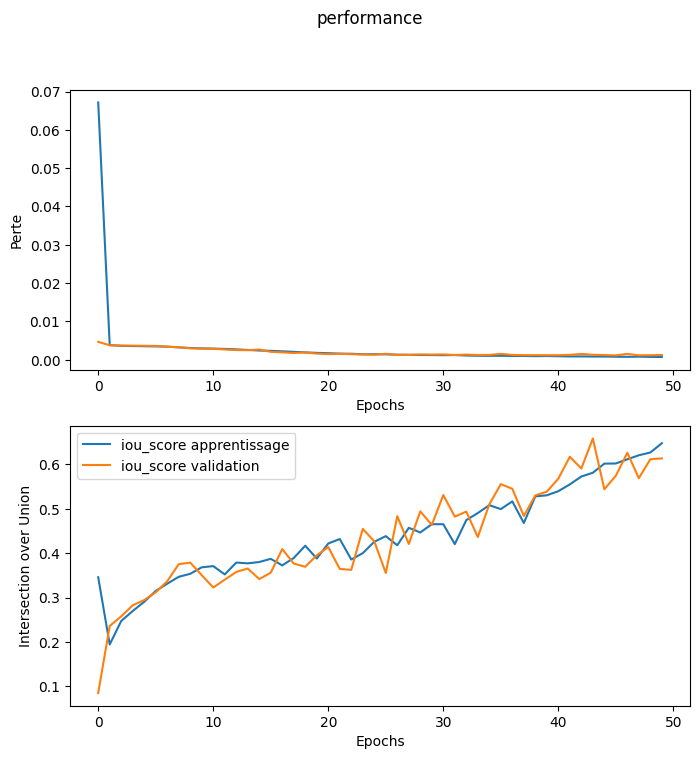

In [18]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 8))
plt.suptitle("performance") 
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 50), hist.history["loss"], label="Perte apprentissage")
plt.plot(np.arange(0, 50), hist.history["val_loss"], label="Perte validation")
plt.xlabel("Epochs")
plt.ylabel("Perte") 
plt.subplot(2, 1, 2)
plt.plot(np.arange(0, 50), hist.history["iou_score"], label="iou_score apprentissage")
plt.plot(np.arange(0, 50), hist.history["val_iou_score"], label="iou_score validation") 
plt.xlabel("Epochs") 
plt.ylabel("Intersection over Union")


plt.legend()


In [19]:
fcn.evaluate(Xtest,Ytest,batch_size=8)

36/36 [==============================] - 2s 59ms/step - loss: 0.0012 - iou_score: 0.6136


[0.001246687606908381, 0.6135594844818115]

In [20]:


y_1 = fcn.predict(Xtest[3].reshape((1,512,512, 1)))

1/1 [==============================] - 0s 446ms/step


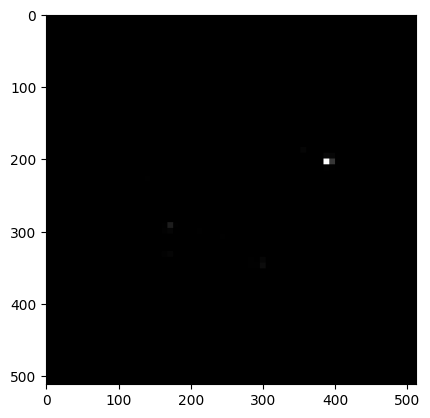

In [21]:
y_1 = y_1.reshape((512,512))
plt.imshow(y_1,cmap="gray")

In [22]:
y_1.max()

0.1409061

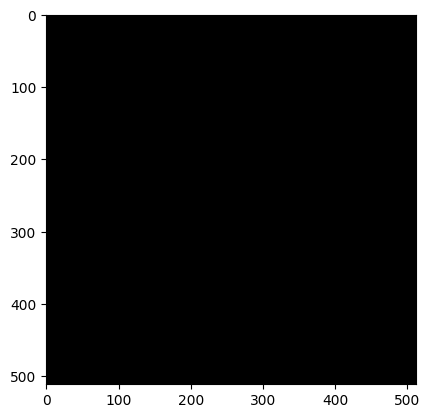

In [23]:
y_1 = np.where(y_1>0.5,1,0)
plt.imshow(y_1,cmap="gray")

In [24]:

norm_img = Xtest[3].reshape((512,512))
img = norm_img * 255

/tmp/ipykernel_35/2819400389.py:6: UserWarning: No contour levels were found within the data range.
  ax2.contour(y_1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)


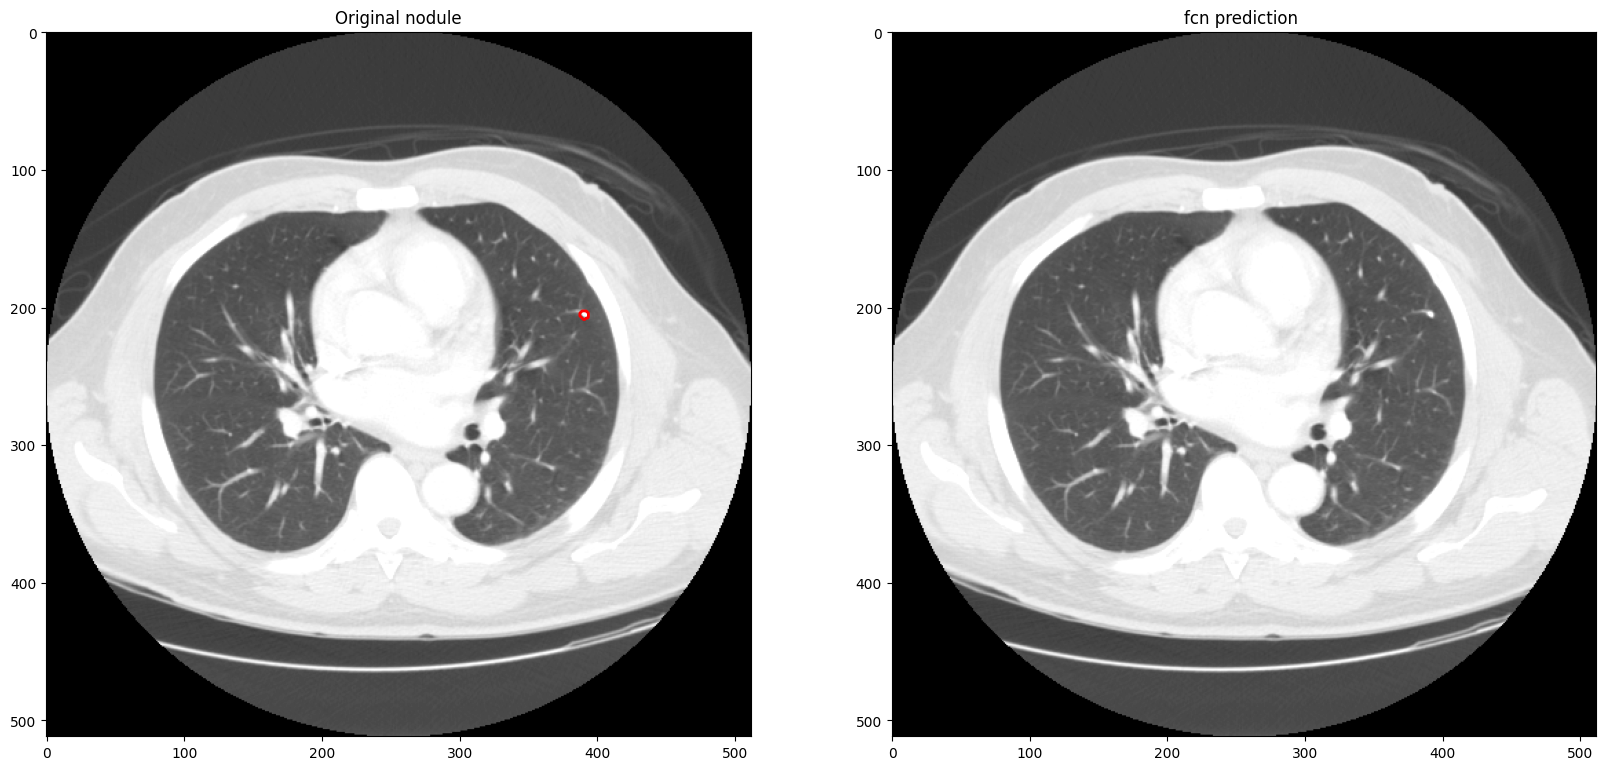

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))
ax1.imshow(img,cmap="gray" )
ax1.set_title('Original nodule')
ax2.imshow(img,cmap='gray')
ax2.set_title('fcn prediction ')
ax2.contour(y_1.reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
ax1.contour(Ytest[3].reshape((512,512)), levels=[0.4], colors='r', linewidths=2)
plt.show()

In [26]:
fcn.save("fcn.h5")